## Example usage to plot methane and water lines around 3270 nm

### Workflow 

     1. initiate a 'Spectra' object
     2. add observer
     3. add gass_cells & gasses
     4. download data (runs the hapi functions)
     5. plot
    
    comment: the arguments of the gas_cell method are the default values as on spectracalc.com
             ! when using multiple gas cells, the spectra are calculated seperately and plotted on top of each other. (Not combined absorption as in spectracalc)

In [66]:
%%capture
%load_ext autoreload
%autoreload 2
from classes import Spectra, Observer, HiddenPrints

In [71]:
%%capture
#%% 1. create a spectrum
my_spectrum = Spectra(name = 'Methane_Line_3270_nm')

#%% 2. add an observer
my_spectrum.observer = Observer(unit  = 'lam',      #'wav' : wavenumer [1/cm] | 'lam' : wavelength [nm]
                                lower =  3269.0,    
                                upper =  3274.0,   
                                )
#%% 3. add gas_cells (may consist of multiple gasses) with gasses
# cell 0
my_spectrum.add_gas_cell(temperature    = 296,          # K
                         pressure       = 1,            # atm
                         length         = 100,          # cm
                         no_gasses      = 1)            # number of gasses
my_spectrum.gas_cells[-1].add_gas(gas_name  = "H2O",    # as in hitran
                                    VMR       = 1E-2)                                  
# cell 1
my_spectrum.add_gas_cell()
my_spectrum.gas_cells[-1].add_gas(gas_name  = "CH4",
                                  VMR       = 100E-6)

#%% 4. download (running hapi functions)
with HiddenPrints():            # disables hapi stdout
    my_spectrum.download(line_list=True)  # by setting line_list to false,
                                          # the linelist will nor be downloaded nor plotted.

To double check that everything is as desired, you can print a summary of your setup.

In [ ]:
print(my_spectrum)

The plot function may be adjusted to ones needs.
If line list has not been downloaded (step 4), it will not be plotted.

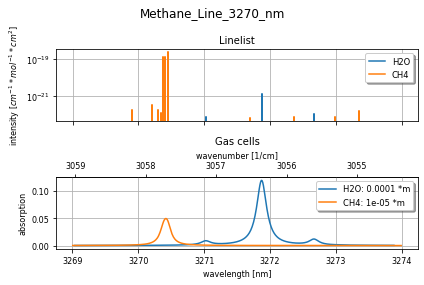

In [75]:
#%% 5. plot
my_spectrum.plot()

In [73]:
#%% 6. export
my_spectrum.export(directory = 'test')